In [1]:
#Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Importando os dados e verificando as informações básicas
df = pd.read_csv('/datasets/project_sql_result_01.csv')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [3]:
#Importando os dados e verificando as informações básicas
df2 = pd.read_csv('/datasets/project_sql_result_04.csv')
df2.info()
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [4]:
#Convertendo as colunas de 'obj' para 'str'
df['company_name'] = df['company_name'].astype('string')
df2['dropoff_location_name'] = df2['dropoff_location_name'].astype('string')
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     string
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), string(1)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     string 
 1   average_trips          94 non-null     float64
dtypes: float64(1), string(1)
memory usage: 1.6 KB


In [5]:
#Verifica se há valores nulos
df.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [6]:
#Verifica se há valores nulos
df2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [7]:
#Verifica se há valores duplicados
df.duplicated().sum()

0

In [8]:
#Verifica se há valores duplicados
df2.duplicated().sum()

0

#### Comentário aluna:
Eu sei que o exercício não pede para fazemos essa verificação, mas quis fazer na mesma só para ter certeza.

In [9]:
#Identificar os 10 principais bairros em termos de destinos
top_bairros = df2.sort_values(by='average_trips', ascending=False).head(10)
print(top_bairros[['dropoff_location_name', 'average_trips']])

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


<AxesSubplot:title={'center':'Top 10 bairros de Chicago por destinos (nov/2017)'}, xlabel='Bairro', ylabel='Número médio de viagens'>

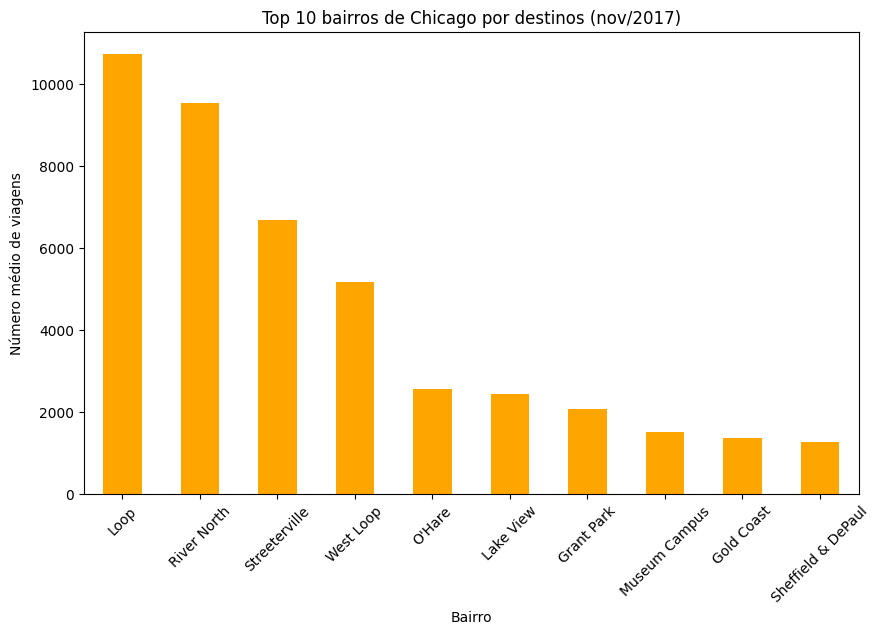

In [10]:
#Criando gráfico
top_bairros.set_index('dropoff_location_name')['average_trips'].plot  (xlabel= 'Bairro',
                  ylabel= 'Número médio de viagens',
                  figsize=(10,6),
                  title='Top 10 bairros de Chicago por destinos (nov/2017)',
                  kind='bar',
                  color='orange',
                  rot=45)



### Análise da aluna:
É possível analisar a partir do gráfico que a maioria das pessoas pedem um táxi para o bairro 'Loop', mais de 10000 viagens terminam nele. O segundo bairro mais frequentado tem quase 10000 viagens. Os restantes já baixam para menos menos de 8000. Por que será que o bairro "Loop" é o que tem mais viagens? É o maior bairro de Chicago? O mais famoso talvez, para turistas? Ou talvez seja no centro da cidade e por ser mais movimentado as pessoas prefiram viajar de táxi em vez de ter seus próprios carros ou usar transporte público? 
São muitos os fatores que podem influenciar, mas com certeza deveriamos investigar o maior ponto de saída das viajens e colocar mais táxis disponíveis lá. 

<AxesSubplot:title={'center':'Top 10 companhias de Chicago com mais corridas(nov/2017)'}, xlabel='Companhia', ylabel='Número médio de corridas(15 a 16 de novembro/2017)'>

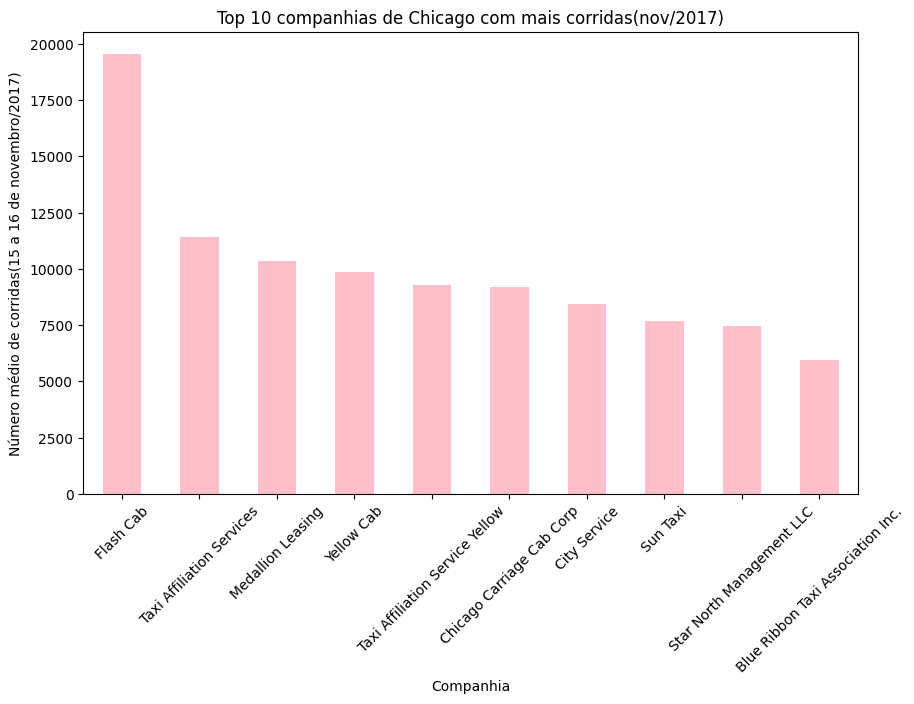

In [11]:
#Criando gráfico
top_companhias = df.set_index('company_name')['trips_amount'].head(10)
top_companhias.plot  (xlabel= 'Companhia',
                  ylabel= 'Número médio de corridas(15 a 16 de novembro/2017)',
                  figsize=(10,6),
                  title='Top 10 companhias de Chicago com mais corridas(nov/2017)',
                  kind='bar',
                  color='pink',
                  rot=45)


### Análise da aluna:
Podemos perceber que a companhia mais utilizada é a 'Flash Cab' com quase 20000 corridas entre os dias 15 e 16 em novembro de 2017. As seguintes seguem um padrão de menos de 12500 e mais de 5000. Será a maior empresa de táxi de Chicago? A mais barata talvez?

## Testando hipóteses

In [12]:
#Importando os dados e verificando seu conteúdo
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
#Somente verificando os valores nulos
df3.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [14]:
#Somente verificando os valores duplicados
df3['start_ts'].duplicated().sum()

987

In [15]:
df3['weather_conditions'].duplicated().sum()

1066

In [16]:
df3['duration_seconds'].duplicated().sum()

573

In [17]:
##Todas as colunas tem valores duplicados, porém decidi deixar eles, pois é possível que as situações tenham ocorrido mais de uma vez do que ser simplesmente um valor duplicado.

### Hipótese nula:
"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos." 
Apresenta a hipótese "sem efeito".

### Hipótese alternativa:
"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare  muda nos sábados chuvosos." 
Apresente a hipótese "com efeito"

Alpha = 0,05

In [18]:
# Converte start_ts para datetime
df3['start_ts'] = pd.to_datetime(df3['start_ts'])

In [24]:

# Cria coluna com dia da semana (0=segunda, 5=sábado)
df3['weekday'] = df3['start_ts'].dt.weekday
saturdays = df3[df3['weekday'] == 5]

# Seleciona sábados chuvosos
rainy_saturdays = saturdays[saturdays['weather_conditions'].str.contains('Bad', case=False)]

# Seleciona sábados sem chuva
normal_saturdays = saturdays[saturdays['weather_conditions'].str.contains('Good', case=False)]

#Calcula a duração
rainy_durations = rainy_saturdays['duration_seconds']
normal_durations = normal_saturdays['duration_seconds']

rainy_durations.var(), normal_durations.var()

(520294.086002483, 576382.009689509)

In [ ]:

#Definindo o nível de significância
alpha = 0.05

#Verificando se as variâncias são iguais ou diferentes 

#if rainy_saturdays.equals(normal_saturdays):
if rainy_durations.var() ==normal_durations.var():
    print(" As variâncias são idênticas.")
else:
    print(" As variâncias são diferentes.")

#Verificando as teorias
t_stat, p_value = st.ttest_ind(rainy_durations, normal_durations, equal_var=False)
print('t=', t_stat)
print('valor-p:', p_value)

if p_value < alpha:
    print('Rejeitamos a hipótese nula e aceitamos a hipótese alternativa: a duração média muda nos sábados chuvosos')
else:
    print('Aceitamos a hipótese nula e rejeitamos a hipótese alternativa: a duração média não muda nos sábados chuvosos')


✅ As variâncias são diferentes.
t= 7.186034288068629
valor-p: 6.738994326108734e-12
Rejeitamos a hipótese nula e aceitamos a hipótese alternativa: a duração média muda nos sábados chuvosos
